In [1]:
import numpy as np
import networkx as nx
import torch
from torch_geometric.data import Data
import time

import random
from torch_geometric.utils import from_networkx

import matplotlib.pyplot as plt

from torch_geometric.nn import SAGEConv

from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
import torch.nn.functional as F

import sys
sys.path.insert(1,'../src')
from DataLoader import RGGDataset
from TwoLayerGraphSage import GCN, cGCN

DL = RGGDataset(root = '//home/groups/ai/maskey/input')

09:01:24|TQ-INFO| Initializing torchquad.


In [2]:
import pickle

In [3]:
model = GCN()
model.load_state_dict(torch.load( '../models/GCNTwoLayersGraphSage'))

cGCNN = cGCN()
model.load_state_dict(torch.load( '../models/cGCNTwoLayersGraphSage'))

<All keys matched successfully>

In [ ]:
fct = lambda x: x[:,0]*x[:,1]
L2Errors = []
start = time.time()
for i in range(1, 302, 100):
    data = DL.get(i) 
    pos = data.pos
    #pos = pos.to(device)
    cfct = cGCNN.forward(fct)
        
    b = torch.empty(( 0 ))
    for i, w in enumerate(pos):
        b = torch.cat((b, cfct(w)), 0)
        #d = torch.reshape(b,(4, len(x)))
        
    #data = DL.get(i)
    #data = data.to(device)
    nodeErrors = b - model.forward(data)
    L2Error = torch.sqrt(1/len(nodeErrors)*torch.sum(torch.pow(nodeErrors,2)))
    L2Errors.append(L2Error)
end = time.time()
print(f"Took {(end-start)* 1000.0:.3f} ms")

In [ ]:
err = [x.detach().numpy() for x in L2Errors]

In [ ]:
xAxis = list(range(0,302, 100))
fig = plt.figure()
plt.xlabel('Nodes')
plt.ylabel('l2error')
plt.plot(xAxis,err[:])
#fig.savefig('../output/l2Error' + str(1002) + 'Nodes.png', dpi=fig.dpi)

In [ ]:
slope, intercept = np.polyfit(np.log(xAxis[1:]), np.log(err[1:]), 1)
print(slope)
plt.loglog(xAxis[1:], err[1:], '--')
#fig.savefig('../output/Logl2Error' + str(1002) + 'Nodes.png', dpi=fig.dpi)

In [ ]:
L2Errors

with open('../output/2LayerGraphSagel2Error1002Nodes.pickle', 'rb') as data:
    l2_errors2 = pickle.load(data)

In [ ]:
low_pass = lambda x: (1+(torch.tensor(x[:,0]**2 + x[:,1]**2))).pow_(-1)

In [7]:
fct = lambda x:  (1+(torch.tensor(x[:,0]**2 + x[:,1]**2))).pow_(-1)
L2Errors = []
start = time.time()
for i in range(1, 102, 100):
    data = DL.get(i) 
    pos = data.pos
    signal = low_pass(data.pos)
    signal = torch.reshape(signal,( len(signal),1))
    data.x = signal
    #pos = pos.to(device)
    cfct = cGCNN.forward(fct)
        
    b = torch.empty(( 0 ))
    for i, w in enumerate(pos):
        b = torch.cat((b, cfct(w)), 0)
        #d = torch.reshape(b,(4, len(x)))
        
    #data = DL.get(i)
    #data = data.to(device)
    nodeErrors = b - model.forward(data)
    L2Error = torch.sqrt(1/len(nodeErrors)*torch.sum(torch.pow(nodeErrors,2)))
    L2Errors.append(L2Error)
end = time.time()
print(f"Took {(end-start)* 1000.0:.3f} ms")

<ipython-input-4-e66a321be338>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  low_pass = lambda x: (1+(torch.tensor(x[:,0]**2 + x[:,1]**2))).pow_(-1)
09:04:40|TQ-INFO| Integration grid created.
09:04:41|TQ-INFO| Computed integral was tensor(-0.0183081739, grad_fn=<SumBackward1>).
09:04:41|TQ-INFO| Integration grid created.
09:04:41|TQ-INFO| Computed integral was tensor(0.0947753191).
09:04:41|TQ-INFO| Integration grid created.
09:04:42|TQ-INFO| Computed integral was tensor(-0.0270670876, grad_fn=<SumBackward1>).
09:04:42|TQ-INFO| Integration grid created.
09:04:42|TQ-INFO| Computed integral was tensor(0.1180989519).
09:04:42|TQ-INFO| Integration grid created.
09:04:43|TQ-INFO| Computed integral was tensor(-0.0289387852, grad_fn=<SumBackward1>).
09:04:43|TQ-INFO| Integration grid created.
09:04:43|TQ-INFO| Computed integral was tensor(

09:05:05|TQ-INFO| Integration grid created.
09:05:05|TQ-INFO| Computed integral was tensor(0.1253644377).
09:05:05|TQ-INFO| Integration grid created.
09:05:06|TQ-INFO| Computed integral was tensor(-0.0155808441, grad_fn=<SumBackward1>).
09:05:06|TQ-INFO| Integration grid created.
09:05:06|TQ-INFO| Computed integral was tensor(0.0636887401).
09:05:06|TQ-INFO| Integration grid created.
09:05:07|TQ-INFO| Computed integral was tensor(-0.0241446849, grad_fn=<SumBackward1>).
09:05:07|TQ-INFO| Integration grid created.
09:05:07|TQ-INFO| Computed integral was tensor(0.1261048615).
09:05:07|TQ-INFO| Integration grid created.
09:05:07|TQ-INFO| Computed integral was tensor(-0.0187540539, grad_fn=<SumBackward1>).
09:05:07|TQ-INFO| Integration grid created.
09:05:07|TQ-INFO| Computed integral was tensor(0.0680272132).
09:05:07|TQ-INFO| Integration grid created.
09:05:08|TQ-INFO| Computed integral was tensor(-0.0331402719, grad_fn=<SumBackward1>).
09:05:08|TQ-INFO| Integration grid created.
09:05:08

09:05:31|TQ-INFO| Computed integral was tensor(-0.0277872756, grad_fn=<SumBackward1>).
09:05:31|TQ-INFO| Integration grid created.
09:05:31|TQ-INFO| Computed integral was tensor(0.1257346570).
09:05:31|TQ-INFO| Integration grid created.
09:05:31|TQ-INFO| Computed integral was tensor(-0.0193716381, grad_fn=<SumBackward1>).
09:05:31|TQ-INFO| Integration grid created.
09:05:31|TQ-INFO| Computed integral was tensor(0.0778263658).
09:05:31|TQ-INFO| Integration grid created.
09:05:32|TQ-INFO| Computed integral was tensor(-0.0160042923, grad_fn=<SumBackward1>).
09:05:32|TQ-INFO| Integration grid created.
09:05:32|TQ-INFO| Computed integral was tensor(0.0634457916).
09:05:32|TQ-INFO| Integration grid created.
09:05:33|TQ-INFO| Computed integral was tensor(-0.0326926373, grad_fn=<SumBackward1>).
09:05:33|TQ-INFO| Integration grid created.
09:05:33|TQ-INFO| Computed integral was tensor(0.1255958080).
09:05:33|TQ-INFO| Integration grid created.
09:05:34|TQ-INFO| Computed integral was tensor(-0.02

Took 74114.640 ms


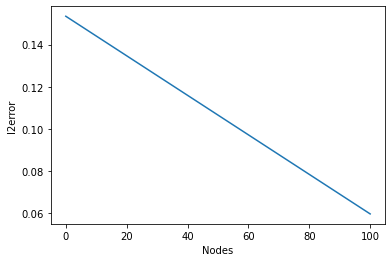

In [8]:
err = [x.detach().numpy() for x in L2Errors]
xAxis = list(range(0,102, 100))
fig = plt.figure()
plt.xlabel('Nodes')
plt.ylabel('l2error')
plt.plot(xAxis,err[:])
#fig.savefig('../output/l2Error' + str(1002) + 'Nodes.png', dpi=fig.dpi)